<a href="https://colab.research.google.com/github/JianfengMI/MLprojects/blob/main/Heart_Attack_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Risk Predictor

## We will use various algorithms to predict the risk ans see which one performs best.
## We will use Auto ML library EVALML to predict the results.

## For this project, we will do following things:


*   Data Analysis
*   Feature Engineering
*   Standardization
*   Model Building
*   Predictions

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [2]:
# Mount google drive and upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

### Understanding the Data
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack
1= more chance of heart attack

In [4]:
# summary the data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.shape

(303, 14)

In [6]:
# check if there are missing data
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [7]:
# check if any variables are correlated each other
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

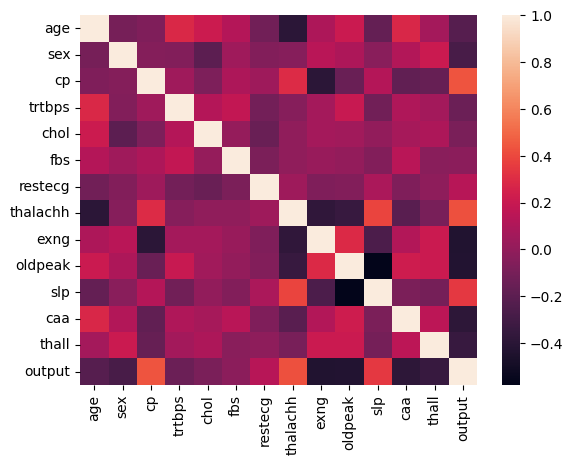

In [8]:
# plot it
sns.heatmap(df.corr(), annot=False)

There are no variables highly correlated to each other

/tmp/ipython-input-3951858992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=20)


<Axes: title={'center': 'Age of Patients'}, xlabel='age', ylabel='Density'>

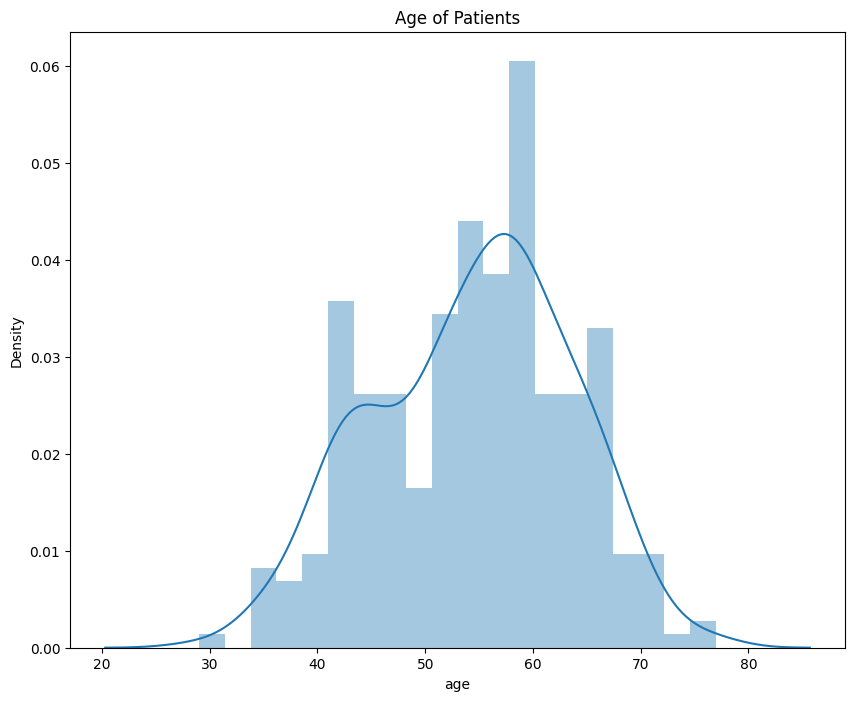

In [9]:
plt.figure(figsize=(10,8))
plt.title("Age of Patients")
sns.distplot(df['age'], bins=20)

<Axes: title={'center': 'Sex of Patients'}, xlabel='sex', ylabel='count'>

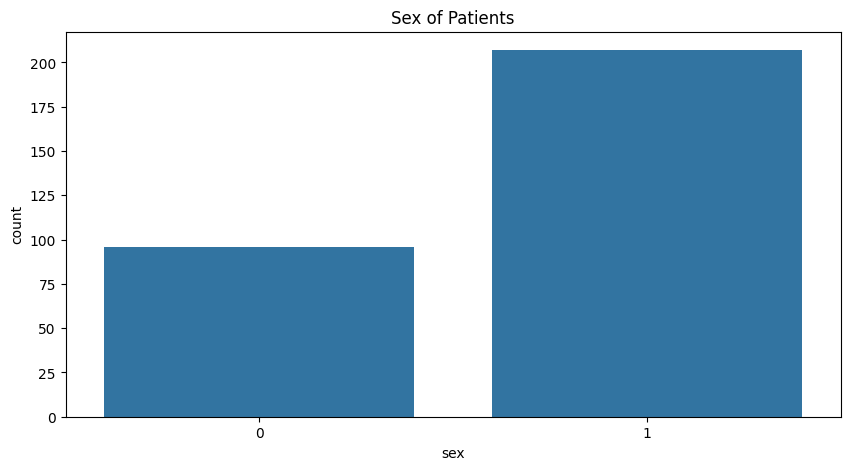

In [10]:
plt.figure(figsize=(10,5))
plt.title("Sex of Patients")
sns.countplot(x='sex', data=df)

In [11]:
cp_data = df['cp'].value_counts().reset_index()
cp_data.columns = ['cp', 'count']
cp_data['cp'][3] = 'asymptomatic'
cp_data['cp'][2]= 'non-anginal'
cp_data['cp'][1]= 'Atyppical Anigma'
cp_data['cp'][0]= 'Typical Anigma'
cp_data

/tmp/ipython-input-1775564469.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cp_data['cp'][3] = 'asymptomatic'
/tmp/ipython-input-1775564469.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an erro

,cp,count
0,Typical Anigma,143
1,Atyppical Anigma,87
2,non-anginal,50
3,asymptomatic,23


<Axes: title={'center': 'Chest Pain Type'}, xlabel='cp', ylabel='count'>

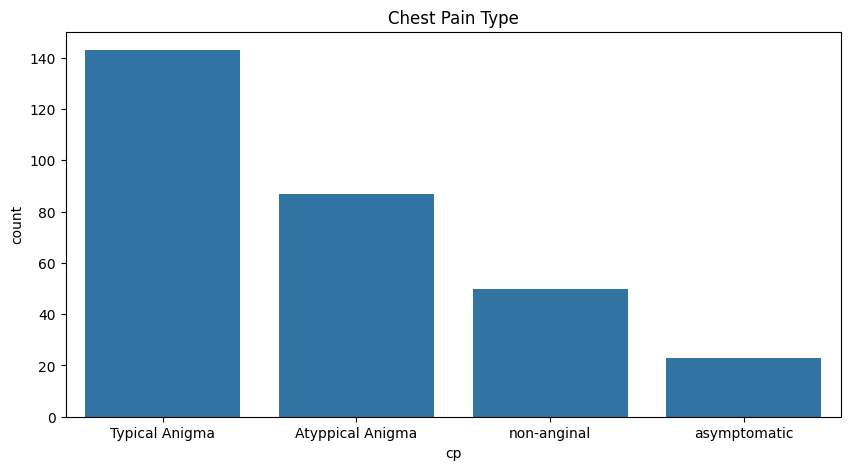

In [12]:
plt.figure(figsize=(10,5))
plt.title("Chest Pain Type")
sns.barplot(x='cp', y='count', data=cp_data)

In [13]:
ecg_data = df.restecg.value_counts().reset_index()
ecg_data.columns = ['rest_ecg', 'count']
ecg_data['rest_ecg'][0] = 'Normal'
ecg_data['rest_ecg'][1] = 'ST-T Wave Abnormality'
ecg_data['rest_ecg'][2] = 'Left Ventricular Hypertrophy'
ecg_data

/tmp/ipython-input-3433213451.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ecg_data['rest_ecg'][0] = 'Normal'
/tmp/ipython-input-3433213451.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an err

,rest_ecg,count
0,Normal,152
1,ST-T Wave Abnormality,147
2,Left Ventricular Hypertrophy,4


<Axes: title={'center': 'Resting Electrocardiographic Results'}, xlabel='rest_ecg', ylabel='count'>

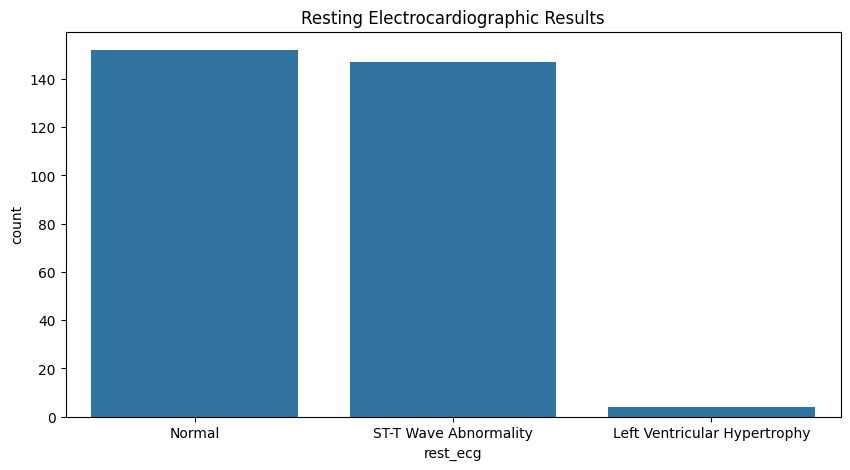

In [14]:
plt.figure(figsize=(10,5))
plt.title("Resting Electrocardiographic Results")
sns.barplot(x='rest_ecg', y='count', data=ecg_data)

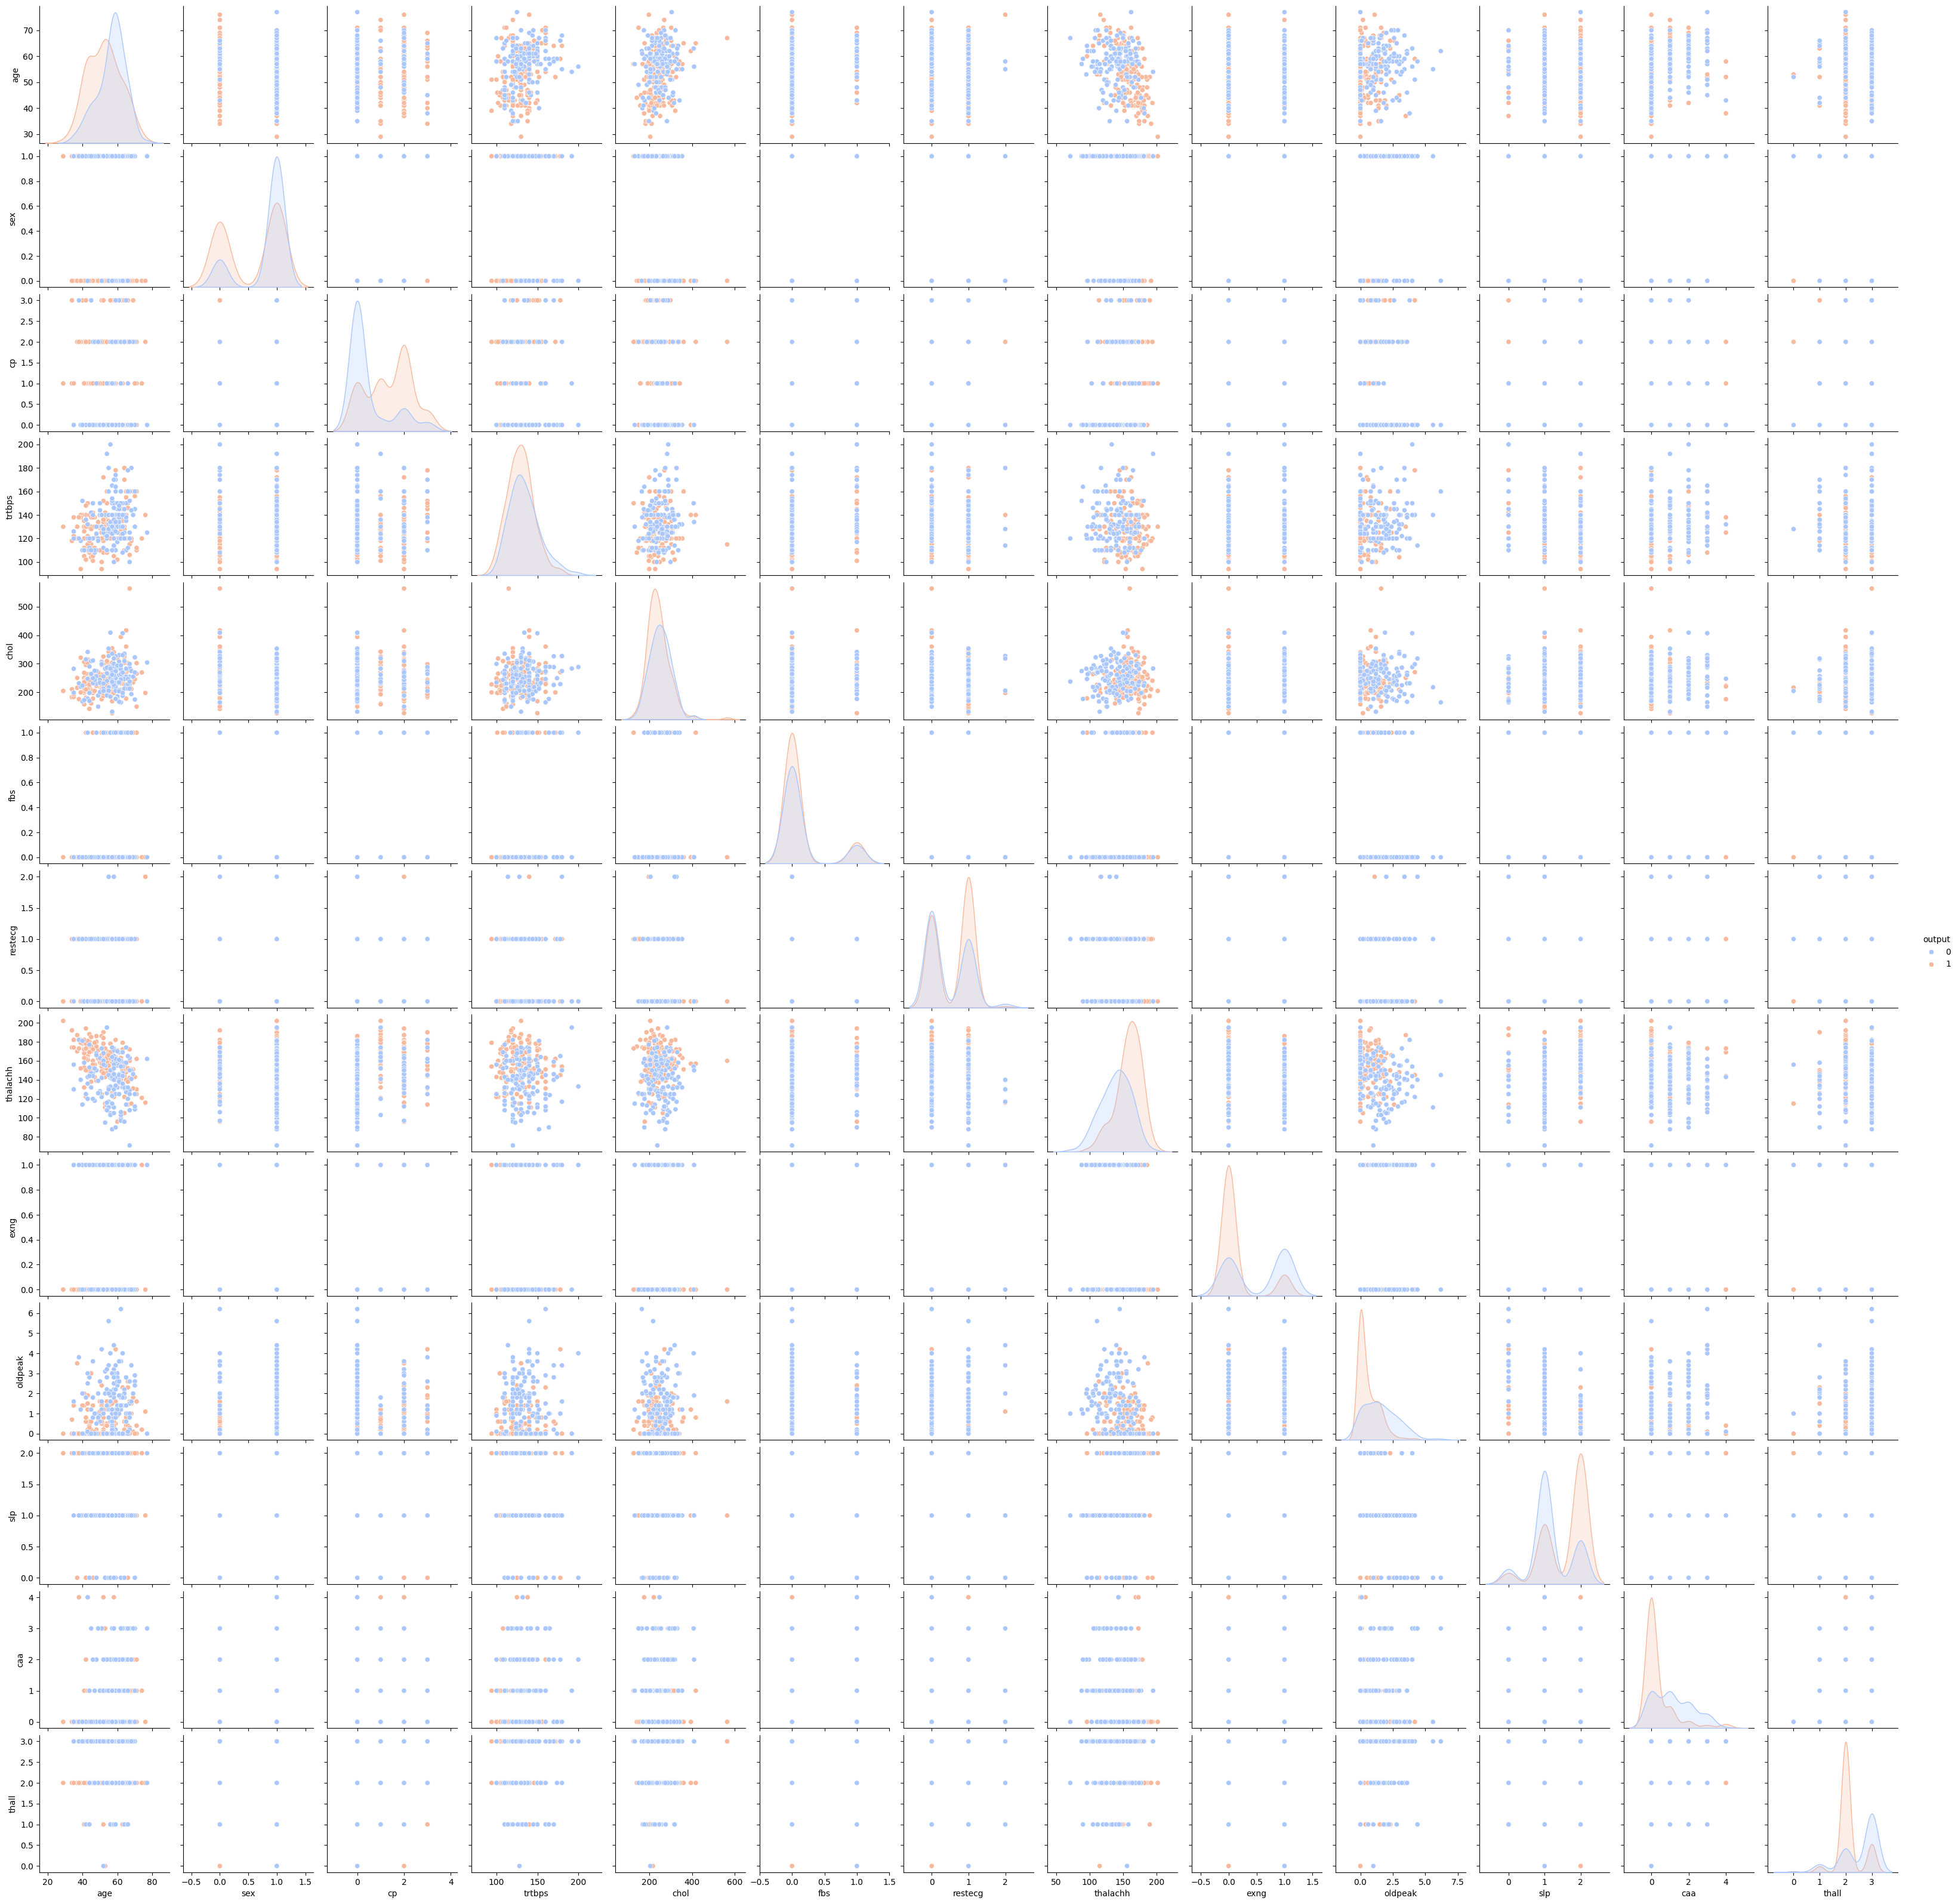

In [15]:
# use seaborn to to pair analysis
sns.pairplot(df, hue='output', palette='coolwarm')

/tmp/ipython-input-4274570116.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trtbps, kde=True, color='magenta')
/tmp/ipython-input-4274570116.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.thalachh, kde=True, color='green')


Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

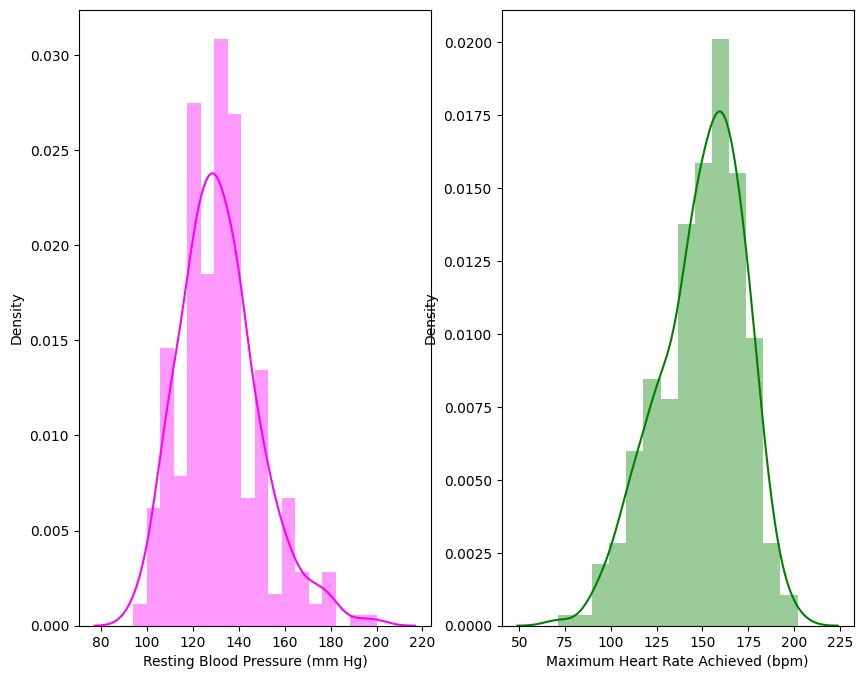

In [16]:
# see continuous variables
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(df.trtbps, kde=True, color='magenta')
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.subplot(1,2,2)
sns.distplot(df.thalachh, kde=True, color='green')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

/tmp/ipython-input-2514076477.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol, kde=True, color='blue')


Text(0.5, 0, 'Cholestoral (mg/dl)')

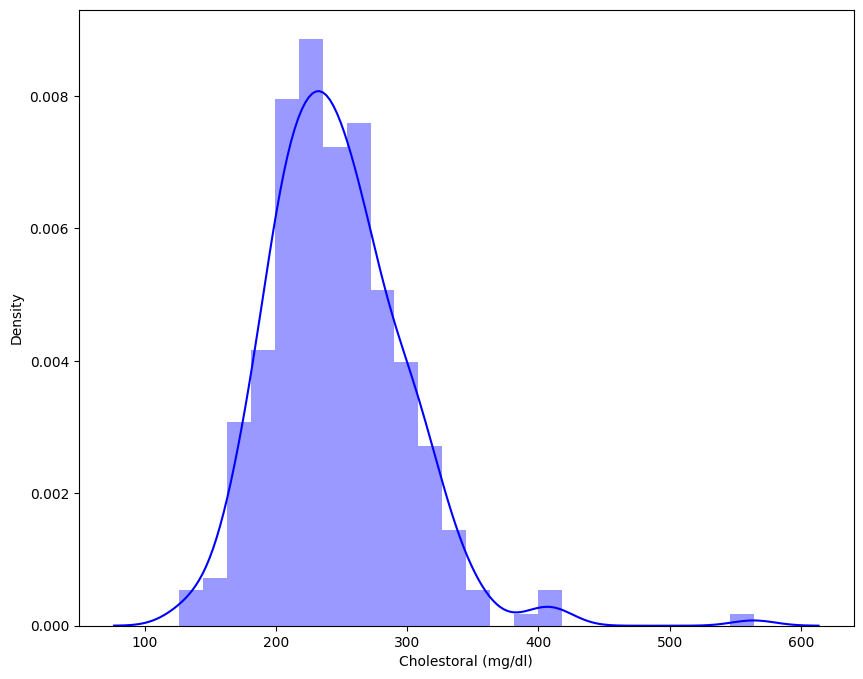

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(df.chol, kde=True, color='blue')
plt.xlabel("Cholestoral (mg/dl)")

In [18]:
# Standardization the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('output', axis=1)
y = df['output']
scaler.fit(X)

StandardScaler()

In [19]:
X = scaler.transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Build models

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
y_encoded = lbl.fit_transform(y_train)

In [22]:
lrg = LogisticRegression()
lrg.fit(X_train, y_encoded)

LogisticRegression()

In [23]:
# see the performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
ytest_encoded = lbl.transform(y_test)
y_pred_lrg = lrg.predict(X_test)

In [25]:
lrg_conf_matrix = confusion_matrix(ytest_encoded, y_pred_lrg)
lrg_acc_score = accuracy_score(ytest_encoded, y_pred_lrg)
print("confussion matrix")
print(lrg_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:", lrg_acc_score*100,'\n')

confussion matrix
[[35  9]
 [ 4 43]]


Accuracy of Logistic Regression: 85.71428571428571 



### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_encoded)

DecisionTreeClassifier()

In [27]:
y_pred_dtc = dtc.predict(X_test)

In [28]:
dtc_conf_matrix = confusion_matrix(ytest_encoded, y_pred_dtc)
dtc_acc_score = accuracy_score(ytest_encoded, y_pred_dtc)
print("confussion matrix")
print(dtc_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:", dtc_acc_score*100,'\n')

confussion matrix
[[30 14]
 [ 4 43]]


Accuracy of Decision Tree: 80.21978021978022 



### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_encoded)

RandomForestClassifier()

In [30]:
y_pred_rfc = rfc.predict(X_test)

In [31]:
rfc_conf_matrix = confusion_matrix(ytest_encoded, y_pred_rfc)
rfc_acc_score = accuracy_score(ytest_encoded, y_pred_rfc)
print("confussion matrix")
print(rfc_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", rfc_acc_score*100,'\n')

confussion matrix
[[33 11]
 [ 5 42]]


Accuracy of Random Forest: 82.41758241758241 



### K Nearest Neighbour

In [32]:
from sklearn.neighbors import KNeighborsClassifier


In [33]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_encoded)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != ytest_encoded))

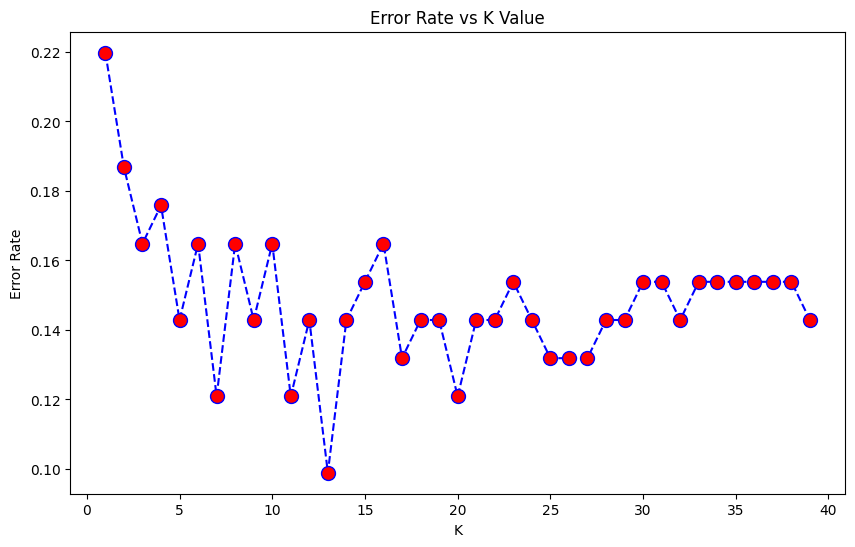

In [34]:
# plot the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show();

In [35]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_encoded)
y_pred_knn = knn.predict(X_test)

In [36]:
knn_conf_matrix = confusion_matrix(ytest_encoded, y_pred_knn)
knn_acc_score = accuracy_score(ytest_encoded, y_pred_knn)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of KNN:", knn_acc_score*100,'\n')

confussion matrix
[[37  7]
 [ 2 45]]


Accuracy of KNN: 90.10989010989012 



### Support Vector Machine (SVM)

In [37]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_encoded)

SVC()

In [38]:
y_pred_svm = svm.predict(X_test)

In [39]:
svm_conf_matrix = confusion_matrix(ytest_encoded, y_pred_svm)
svm_acc_score = accuracy_score(ytest_encoded, y_pred_svm)
print("confussion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of SVM:", svm_acc_score*100,'\n')

confussion matrix
[[35  9]
 [ 5 42]]


Accuracy of SVM: 84.61538461538461 



### Adaboost Classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(estimator=svm, n_estimators=100, algorithm='SAMME', learning_rate=0.01, random_state=101)
abc.fit(X_train, y_encoded)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=101)

In [41]:
y_pred_abc = abc.predict(X_test)

In [42]:
abc_conf_matrix = confusion_matrix(ytest_encoded, y_pred_abc)
abc_acc_score = accuracy_score(ytest_encoded, y_pred_abc)
abc_conf_matrix, abc_acc_score

(array([[ 0, 44],
        [ 0, 47]]),
 0.5164835164835165)

In [43]:
abc.score(X_test, ytest_encoded)

0.5164835164835165

The performance is very poor, 51%. We will use Grid Search CV for HyperParameter Tuning.

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# put the model name and their Accuracy in a dataframe
model_acc = pd.DataFrame({"Logistic Regression": lrg_acc_score,
                          "Decision Tree": dtc_acc_score,
                          "Random Forest": rfc_acc_score,
                          "KNN": knn_acc_score,
                          "SVM": svm_acc_score}, index=["Accuracy"]).T
model_acc

,Accuracy
Logistic Regression,0.857143
Decision Tree,0.802198
Random Forest,0.824176
KNN,0.901099
SVM,0.846154


In [46]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['none', 'l1','l2', 'elasticnet'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

In [47]:
grid1 = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)

In [48]:
grid1.fit(X_train, y_encoded)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=100, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
325 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [49]:
grid1.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [50]:
# apply the best parameters in LogisticRegression
lrg_best = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
lrg_best.fit(X_train, y_train)
y_pred_lrg_best = lrg_best.predict(X_test)

In [51]:
lrg_best_conf_matrix = confusion_matrix(ytest_encoded, y_pred_lrg_best)
lrg_best_acc_score = accuracy_score(ytest_encoded, y_pred_lrg_best)
lrg_best_conf_matrix, lrg_best_acc_score

(array([[33, 11],
        [ 4, 43]]),
 0.8351648351648352)

In [53]:
# KNN tuning
param_grid = {
    'n_neighbors': [i for i in range(1, 21,2)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_encoded)

In [55]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [57]:
# apply them to KNN
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
knn_best.fit(X_train, y_encoded)
y_pred_knn_best = knn_best.predict(X_test)

In [58]:
knn_best_conf_matrix = confusion_matrix(ytest_encoded, y_pred_knn_best)
knn_best_acc_score = accuracy_score(ytest_encoded, y_pred_knn_best)
knn_best_conf_matrix, knn_best_acc_score

(array([[33, 11],
        [ 6, 41]]),
 0.8131868131868132)

In [67]:
# SVM tuning
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
param_grid = {'C': C, 'kernel': kernel, 'gamma': gamma}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_encoded)

In [68]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [69]:
# apply them to SVC
from sklearn.svm import SVC
svc_best = SVC(C=0.1, gamma='scale', kernel='sigmoid')
svc_best.fit(X_train, y_encoded)
y_pred_svc_best = svc_best.predict(X_test)

In [70]:
svc_best_conf_matrix = confusion_matrix(ytest_encoded, y_pred_svc_best)
svc_best_acc_score = accuracy_score(ytest_encoded, y_pred_svc_best)
svc_best_conf_matrix, svc_best_acc_score

(array([[32, 12],
        [ 1, 46]]),
 0.8571428571428571)

In [71]:
# put the accuracies and best models together
model_acc_best = pd.DataFrame({"Logistic Regression": lrg_best_acc_score,
                          "KNN": knn_best_acc_score,
                          "SVM": svc_best_acc_score}, index=["Accuracy"]).T
model_acc_best

,Accuracy
Logistic Regression,0.835165
KNN,0.813187
SVM,0.857143


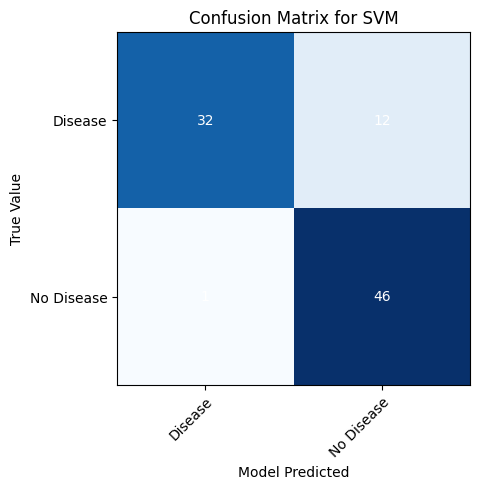

Accuracy of SVM: 85.71428571428571


In [73]:
# Let's build a proper confusion matrix for the best model (SVM)
options = ['Disease','No Disease']

fig, ax = plt.subplots()
im = ax.imshow(svm_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# show all ticks
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))

# label ticks
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over dat dimensions and create text annotations
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, svc_best_conf_matrix[i, j],
                       ha="center", va="center", color="white")

ax.set_title("Confusion Matrix for SVM")
fig.figure.tight_layout()
plt.xlabel('Model Predicted')
plt.ylabel('True Value')
plt.show()
print(f"Accuracy of SVM: {svc_best_acc_score*100}")

# Use *Auto ML* to chose suitable model
EvalML is an open_source AutoML library written in python that automates a large part of the machine learning process and we can easily evalute which ML pipeline works better.

In [1]:
# install EvalML
!pip install evalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 27.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Explore alternative automl libraries (since EvalML has a problem installing in colab notebook

### Subtask:
Explore alternative AutoML libraries like AutoGluon or TPOT to see if they can be used to build models for the heart attack prediction task, given the persistent issues with EvalML.


**Reasoning**:
Given the persistent issues with EvalML, I will explore using AutoGluon as an alternative AutoML library to build models for the heart attack prediction task. The first step is to install AutoGluon.



In [3]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking

In [5]:
!pip list | grep -E 'numpy|pandas|autogluon'

autogluon                             1.4.0
autogluon.common                      1.4.0
autogluon.core                        1.4.0
autogluon.features                    1.4.0
autogluon.multimodal                  1.4.0
autogluon.tabular                     1.4.0
autogluon.timeseries                  1.4.0
geopandas                             1.1.1
numpy                                 2.0.2
pandas                                2.0.3
pandas-datareader                     0.10.0
pandas-gbq                            0.29.2
pandas-stubs                          2.2.2.240909
sklearn-pandas                        2.2.0


In [6]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2025.9.0 requires pandas>=2.2, but you have pandas 2.0.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is i

In [1]:
!pip install pandas==2.0.3 autogluon.tabular

In [1]:
import numpy as np
import pandas as pd
from autogluon.tabular import TabularPredictor
print(np.__version__, pd.__version__)  # Should print 1.26.4, 2.0.3
print("Imports successful")

1.26.4 2.0.3
Imports successful


In [2]:
# load data
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
predictor = TabularPredictor(label='output').fit(df)
print("Model trained successfully")

No path specified. Models will be saved in: "AutogluonModels/ag-20250910_011321"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.71 GB / 12.67 GB (84.5%)
Disk Space Avail:   61.72 GB / 107.72 GB (57.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU me

Model trained successfully


In [5]:
# show the best model
predictor.leaderboard(df, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr,0.970297,0.852459,accuracy,0.087460,0.065578,0.677247,0.087460,0.065578,0.677247,1,True,2
1,RandomForestGini,0.970297,0.852459,accuracy,0.096902,0.075806,0.798425,0.096902,0.075806,0.798425,1,True,1
2,ExtraTreesGini,0.966997,0.836066,accuracy,0.095305,0.065308,0.663146,0.095305,0.065308,0.663146,1,True,4
3,ExtraTreesEntr,0.966997,0.836066,accuracy,0.100927,0.076389,0.655233,0.100927,0.076389,0.655233,1,True,5
4,XGBoost,0.953795,0.885246,accuracy,0.016282,0.003038,0.184947,0.016282,0.003038,0.184947,1,True,7
5,CatBoost,0.917492,0.901639,accuracy,0.007016,0.001588,1.187111,0.007016,0.001588,1.187111,1,True,3
6,NeuralNetFastAI,0.907591,0.918033,accuracy,0.064312,0.010531,2.797826,0.064312,0.010531,2.797826,1,True,6
7,WeightedEnsemble_L2,0.907591,0.918033,accuracy,0.067368,0.011616,2.883899,0.003056,0.001085,0.086073,2,True,8


In [7]:
# detailed descripton of the best model
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      NeuralNetFastAI   0.918033    accuracy       0.010531  2.797826                0.010531           2.797826            1       True          6
1  WeightedEnsemble_L2   0.918033    accuracy       0.011616  2.883899                0.001085           0.086073            2       True          8
2             CatBoost   0.901639    accuracy       0.001588  1.187111                0.001588           1.187111            1       True          3
3              XGBoost   0.885246    accuracy       0.003038  0.184947                0.003038           0.184947            1       True          7
4     RandomForestEntr   0.852459    accuracy       0.065578  0.677247                0.065578           0.677247            1       True          2
5     RandomForestGini   0.852459    accurac

{'model_types': {'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForestGini': 0.8524590163934426,
  'RandomForestEntr': 0.8524590163934426,
  'CatBoost': 0.9016393442622951,
  'ExtraTreesGini': 0.8360655737704918,
  'ExtraTreesEntr': 0.8360655737704918,
  'NeuralNetFastAI': 0.9180327868852459,
  'XGBoost': 0.8852459016393442,
  'WeightedEnsemble_L2': 0.9180327868852459},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForestGini': ['RandomForestGini'],
  'RandomForestEntr': ['RandomForestEntr'],
  'CatBoost': ['CatBoost'],
  'ExtraTreesGini': ['ExtraTreesGini'],
  'ExtraTreesEntr': ['ExtraTreesEntr'],
  'NeuralNetFastAI': ['NeuralNetFastAI'],
  'XGBoost': ['XGBoost'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L

In [11]:
# Save model
import pickle
with open('autogluon_predictor.pkl', 'wb') as file:
    pickle.dump(predictor, file)

In [12]:
# Load the model
with open('autogluon_predictor.pkl', 'rb') as file:
    predictor = pickle.load(file)

print("AutoGluon predictor loaded successfully")
print(predictor)

AutoGluon predictor loaded successfully


In [13]:
# test it on X test data
y_pred = predictor.predict(X)
y_pred

,output
0,1
1,0
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


## Try Ensemble Learning method

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
# remount google drive and reload the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reload the data
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Standardization the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('output', axis=1)
y = df['output']
scaler.fit(X)
X = scaler.transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
# import libraries for ensemble learning
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [9]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=101)),
        ('knn', KNeighborsClassifier()),
        ('rf', RandomForestClassifier(random_state=101)),
        ('svc', SVC(random_state=101, probability=True))],
    voting='soft'
)

In [10]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=101)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=101)),
                             ('svc', SVC(probability=True, random_state=101))],
                 voting='soft')

In [11]:
# check the classifier's accuracy
for name, clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test, y_test))

lr = 0.8571428571428571
knn = 0.8571428571428571
rf = 0.8021978021978022
svc = 0.8461538461538461


In [12]:
voting_clf.predict(X_test[:1])

array([0])

In [13]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([0]), array([0]), array([0]), array([0])]

In [14]:
# check the performace on the test set
voting_clf.score(X_test, y_test)

0.8351648351648352

In [15]:
# try "hard" voting
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=101)),
        ('knn', KNeighborsClassifier()),
        ('rf', RandomForestClassifier(random_state=101)),
        ('svc', SVC(random_state=101))],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=101)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=101)),
                             ('svc', SVC(random_state=101))])

In [16]:
# check the classifier's accuracy
for name, clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test, y_test))

lr = 0.8571428571428571
knn = 0.8571428571428571
rf = 0.8021978021978022
svc = 0.8461538461538461


In [17]:
# check the performace on the test set
voting_clf.score(X_test, y_test)

0.8241758241758241

In [18]:
## try bagging and out-of-bag evaluation
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [19]:
bag_clf.oob_score_

0.8113207547169812

In [20]:
bag_clf.oob_decision_function_[:5]

array([[0.90540541, 0.09459459],
       [0.784375  , 0.215625  ],
       [0.17484663, 0.82515337],
       [0.21262458, 0.78737542],
       [0.36912752, 0.63087248]])

## Try neural network (MLP)


In [21]:
# import libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [23]:
mlp_reg = MLPClassifier(hidden_layer_sizes=(100,100,10), random_state=101, max_iter=1000)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
mlp_reg_conf_matrix = confusion_matrix(y_test, y_pred)
mlp_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(mlp_reg_conf_matrix)
print("\n")
print("Accuracy of mlp_reg:", mlp_acc_score*100,'\n')

confussion matrix
[[33 11]
 [ 6 41]]


Accuracy of mlp_reg: 81.31868131868131 



## custome nueral network model by using the sequential API

In [26]:
import tensorflow as tf

In [31]:
X.min()-X.max()

np.float64(-9.925224473632014)

In [32]:
# scale the X down to the 0-1 range
X_train_scaled = X_train / 10
X_test_scaled = X_test / 10

In [34]:
SHAPE = X_train.shape[1]
SHAPE

13

In [36]:
tf.random.set_seed(101)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(SHAPE,)),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,521 (48.91 KB)

 Trainable params: 12,521 (48.91 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=30)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7097 - loss: 0.6850 - val_accuracy: 0.7692 - val_loss: 0.6648
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8066 - loss: 0.6612 - val_accuracy: 0.8242 - val_loss: 0.6368
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8216 - loss: 0.6346 - val_accuracy: 0.8242 - val_loss: 0.6033
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8288 - loss: 0.6021 - val_accuracy: 0.8132 - val_loss: 0.5621
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8307 - loss: 0.5620 - val_accuracy: 0.8022 - val_loss: 0.5134
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8378 - loss: 0.5157 - val_accuracy: 0.8132 - val_loss: 0.4617
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8461 - loss: 0.4688 - val_accuracy: 0.8462 - val_loss: 0.4143
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8510 - loss: 0.4285 - val_accuracy: 0.8571 - val_loss: 0.3758


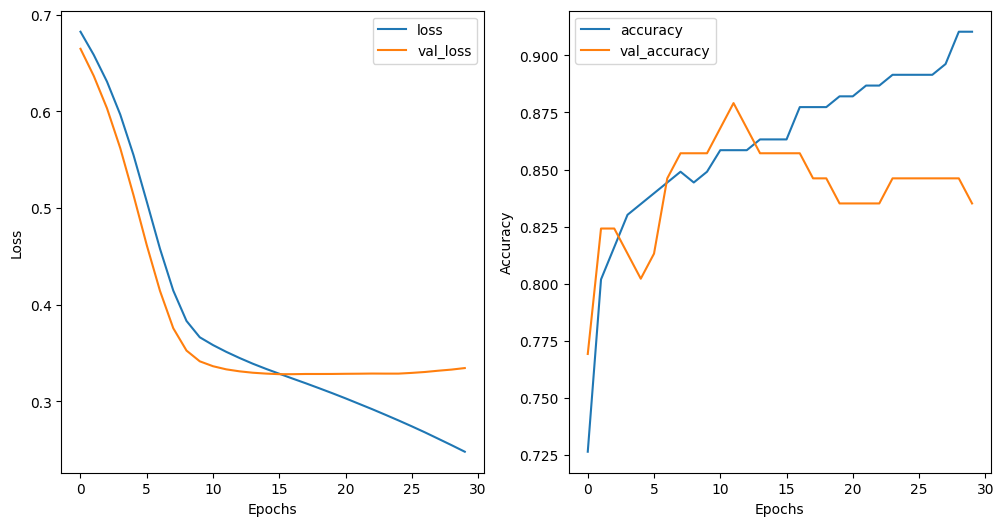

In [41]:
# plot the accuracy and loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
# evaluate the model
model.evaluate(X_test_scaled, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8356 - loss: 0.3276


[0.3345104157924652, 0.8351648449897766]

In [46]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [47]:
# Fine-Tuning neural network hyperparameters
import keras_tuner as kt

def build_model(hp):
  n_hidden = hp.Int('n_hidden', min_value=1, max_value=10, default=2)
  n_neurons = hp.Int('n_neurons', min_value=16, max_value=256, step=16, default=32)
  learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)
  activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'], default='relu')
  optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(SHAPE,)))
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation=activation))

  if optimizer == 'adam':
      optimizer_instance = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  else:
      optimizer_instance = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
  return model

In [48]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory='my_dir',
    project_name='heart_attack'
)

In [49]:
random_search_tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

Trial 10 Complete [00h 00m 11s]
val_accuracy: 0.4065934121608734

Best val_accuracy So Far: 0.8736263811588287
Total elapsed time: 00h 01m 47s


In [50]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = random_search_tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [51]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 6,
 'n_neurons': 96,
 'learning_rate': 0.0017756127466446612,
 'activation': 'relu',
 'optimizer': 'adam'}

In [52]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]

In [55]:
best_trial.summary()

Trial 08 summary
Hyperparameters:
n_hidden: 6
n_neurons: 96
learning_rate: 0.0017756127466446612
activation: relu
optimizer: adam
Score: 0.8736263811588287


In [60]:
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%\n')
print(f'Test loss:{test_loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8653 - loss: 0.3372
Test accuracy: 87.91%

Test loss:0.33091241121292114
